In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from tqdm import tqdm 
tqdm.pandas()

import statsmodels.formula.api as smf
import numpy as np

from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## Import Mobility Data

In [2]:
combined = pd.read_csv(r"/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/hia_covid_combined.csv", dtype={'County_FIPS': 'str'} )

In [3]:
combined['StateCD'] = combined['State Code'] 

In [4]:
combined_samp = combined.sample(frac=.2)

In [5]:
def regress_two_var(df, X, Y, startdate = "2020-01-01", enddate = "2020-10-01"):
    # Cleaning up the dataframe
    df = df[df.Date >= startdate]
    df = df[df.Date <= enddate]
    df = df[df['{Y}'.format(Y=Y)].isna() == False]
    df = df[df['{X}'.format(X=X)].isna() == False]
    #dataframe["ratio"] = dataframe['{Y}'.format(Y=Y)]/dataframe['{X}'.format(X=X)]
    Xvar =  df['{X}'.format(X=X)].values.reshape(-1, 1) 
    Xvar1 = sm.add_constant(Xvar) # need to do this for statsmodels for some reason
    Yvar = df['{Y}'.format(Y=Y)].values.reshape(-1, 1) 
    mod = sm.OLS(endog=Yvar,exog=Xvar1)
    res = mod.fit()
    print(res.summary())
    # Graph the regression
    linear_regressor = LinearRegression()  # create object for the class
    fitted_model = linear_regressor.fit(X=Xvar,y=Yvar)  # perform linear regression
    Y_pred = fitted_model.predict(Xvar)  # make predictions
    #return fitted_model
    plt.scatter(y=Yvar, x=Xvar)
    plt.plot(Xvar, Y_pred, color='red')
    plt.title("{X} on {Y} Regression".format(X=X,Y=Y))
    plt.show()
    #Scatterplot to show data
    sns.scatterplot(y='{Y}'.format(Y=Y),x='{X}'.format(X=X), hue="Division", data=df)

In [6]:
combined_oneday = combined[combined['Date']=='2020-10-01']

In [7]:
combined_oneday

,Unnamed: 0,Date,County_FIPS,State Code,Name,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,workplaces_PCT_CFB,...,Confirmed_New_PER_100K,Confirmed_New_RollingAvg_PER_100K,Deaths_New_RollingAvg_PER_100K,Deaths_New_7_RollingAvg_PER_100K,Deaths_New_14_RollingAvg_PER_100K,Deaths_New_21_RollingAvg_PER_100K,Deaths_New_28_RollingAvg_PER_100K,Region,Division,StateCD
253,253,2020-10-01,01001,AL,Autauga County,5.0,10.0,NaN,NaN,-18.0,...,12.718948,16.352933,0.778711,0.000000,0.000000,0.519141,0.259570,South,East South Central,AL
569,569,2020-10-01,01003,AL,Baldwin County,-3.0,-8.0,4.0,9.0,-23.0,...,13.276947,41.025065,0.210745,0.772732,0.140497,0.210745,0.000000,South,East South Central,AL
885,885,2020-10-01,01005,AL,Barbour County,12.0,NaN,NaN,NaN,-16.0,...,22.899889,17.447535,0.000000,1.090471,0.000000,0.000000,0.000000,South,East South Central,AL
1201,1201,2020-10-01,01007,AL,Bibb County,NaN,NaN,NaN,NaN,-14.0,...,13.286094,15.816778,0.000000,1.265342,0.632671,0.632671,0.632671,South,East South Central,AL
1517,1517,2020-10-01,01009,AL,Blount County,1.0,7.0,NaN,NaN,-21.0,...,13.872752,7.431832,0.000000,0.247728,1.734094,0.495455,0.000000,South,East South Central,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987753,987753,2020-10-01,56037,WY,Sweetwater County,-8.0,NaN,NaN,37.0,-16.0,...,6.737485,4.491657,0.000000,0.000000,0.000000,0.000000,0.000000,West,Mountain,WY
988069,988069,2020-10-01,56039,WY,Teton County,13.0,NaN,NaN,-20.0,-22.0,...,61.074030,38.638672,0.000000,0.000000,0.000000,0.000000,0.000000,West,Mountain,WY
988385,988385,2020-10-01,56041,WY,Uinta County,14.0,NaN,NaN,41.0,-17.0,...,-4.817420,6.193825,0.000000,0.000000,0.000000,0.000000,0.688203,West,Mountain,WY
988701,988701,2020-10-01,56043,WY,Washakie County,NaN,NaN,NaN,NaN,-10.0,...,0.000000,5.192917,0.000000,0.000000,1.730972,0.000000,0.000000,West,Mountain,WY


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     18.89
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           1.53e-05
Time:                        16:16:19   Log-Likelihood:                -4597.0
No. Observations:                 990   AIC:                             9198.
Df Residuals:                     988   BIC:                             9208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.2637      2.177     -7.013      0.0

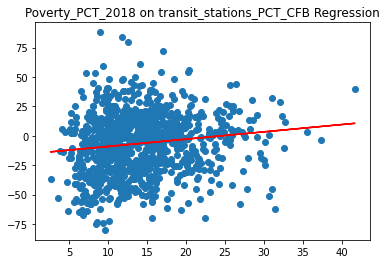

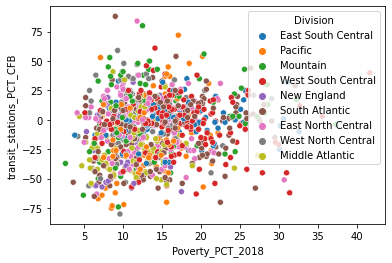

In [8]:
regress_two_var(df=combined_oneday,X="Poverty_PCT_2018",Y="transit_stations_PCT_CFB")

In [ ]:
def multivariate_ols(input_df, Y, Xlist):
    # Reshape the df to avoid NAs
    dataframe = input_df
    dataframe = dataframe[dataframe['{Y}'.format(Y=Y)].isna() == False]
    # Clean out any rows where one of these is NA -- can lead to data loss
    for i in Xlist:
        dataframe = dataframe[dataframe[i].isna() == False]
    # Check to ensure not too much thrown away
    pct_preserved = dataframe.shape[0]/input_df.shape[0]
    print("{pct} percent of the data preserved as non-NA".format(pct = 100*round(pct_preserved,2)))
    Xvar =  dataframe[Xlist]#.values.reshape(-1, len(Xlist)) 
    Xvar = sm.add_constant(Xvar)
    Yvar = dataframe['{Y}'.format(Y=Y)].values.reshape(-1, 1) 
    mod = sm.OLS(endog=Yvar,exog=Xvar,)
    res = mod.fit()
    print(res.summary())
    return res

In [ ]:
Xlist = ['HS_DIPLOMA_ONLY_2018',"Poverty_PCT_2018","Median_Income_2018","SOME_COLLEGE_2018"]

multivariate_ols(input_df=combined, Y="workplaces_PCT_CFB", Xlist=Xlist)

In [ ]:
combined.columns

In [ ]:
combined['StateCD'] = combined['State Code'] 

## Define list of all candidate predictors and then the possible outcomes

In [28]:
full_predictors = [
 'C(Metro)',
 'HS_DIPLOMA_ONLY_2018',
 'PCT_Black_ACS',
 'BACHELORS_PLUS_2018',
 'Confirmed_New_RollingAvg_PER_100K',
 'workplaces_PCT_CFB',
 'residential_PCT_CFB_RollingAvg',
 'Poverty_PCT_2018',
 'Median_Income_2018',
 'C(Region)',
 'C(StateCD)',
    
]

Ylist = [#'Deaths_New_7_RollingAvg_PER_100K',
         #'Deaths_New_14_RollingAvg_PER_100K',
         #'Deaths_New_28_RollingAvg_PER_100K',
         'Deaths_PER_100K']

## Create list of formulas for all combinations

In [29]:
# https://stackoverflow.com/questions/1482308/how-to-get-all-subsets-of-a-set-powerset
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return set(chain.from_iterable(combinations(s, r) for r in range(len(s)+1)))

ps = powerset(full_predictors)
ps_list = [list(i) for i in ps]

In [31]:
textlist = []

for i in ps_list:
    text = '|'
    for x in i:
        text = text+' + '+x
    textlist.append(text)


textlist = [i.replace('| +','') for i in textlist if len(i) > 3]
    
full_form_list = []
for i in textlist:
    for y in Ylist:
        full_form_list.append(y+" ~ "+i)


full_form_list
samp_list = full_form_list[0:50]

In [187]:
len(full_form_list) # Number of the possible equations

2047

## R - Like Formula - Based OLS

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
combined.columns

## Define a Function for Formula-Based OLS

In [17]:
def start_end_mulivariate_ols(formulatxt, startdate="2020-06-01", enddate="2020-11-15", df=combined):
    segmented = df[df.Date > startdate]
    segmented = segmented[segmented.Date < enddate]
    mod = smf.ols(formula=formulatxt , data=segmented, missing='drop')
    res = mod.fit()
    #print(res.summary())
    return res

In [ ]:
mod1 = start_end_mulivariate_ols(startdate = "2020-07-01", enddate = "2020-10-07", formulatxt="""
Deaths_New_RollingAvg_PER_100K ~  workplaces_PCT_CFB + residential_PCT_CFB_RollingAvg + Region""")
print(mod1.summary())

## Test Formula for OLS

In [ ]:
mod1 = start_end_mulivariate_ols(startdate = "2020-10-01", enddate = "2020-10-07", formulatxt="""
Deaths_New_RollingAvg_PER_100K ~ HS_DIPLOMA_ONLY_2018 + residential_PCT_CFB_RollingAvg +
Poverty_PCT_2018 + Median_Income_2018 + C(Region)""")

In [ ]:
#dir(mod1)
#mod1.bic

In [15]:
# Construct monthly daterange tuples

every_month = []
for i in range(4,9):
    a = '2020-0{c}-01'.format(c=i)
    b = '2020-0{c}-01'.format(c=i+1)
    every_month.append((a,b))
every_month.append(('2020-09-01','2020-10-01'))
every_month.append(('2020-10-01','2020-11-01'))
for i in range(10,12):
    a = '2020-{c}-01'.format(c=i)
    b = '2020-{c}-01'.format(c=i+1)
every_month.append((a,b))
every_month

[('2020-04-01', '2020-05-01'),
 ('2020-05-01', '2020-06-01'),
 ('2020-06-01', '2020-07-01'),
 ('2020-07-01', '2020-08-01'),
 ('2020-08-01', '2020-09-01'),
 ('2020-09-01', '2020-10-01'),
 ('2020-10-01', '2020-11-01'),
 ('2020-11-01', '2020-12-01')]

In [16]:
every_3month =[
 ('2020-04-01', '2020-07-01'),
 ('2020-05-01', '2020-08-01'),
 ('2020-06-01', '2020-09-01'),
 ('2020-07-01', '2020-10-01'),
 ('2020-08-01', '2020-11-01'),
 ('2020-09-01', '2020-12-01')
]


In [ ]:
#dir(mod1)

## Function for running model and then graphing it over the different dateranges

In [185]:
def run_timeseries_models(formulatxt, list_dateranges, df):
    list_results = []
    for i in list_dateranges:
        res = start_end_mulivariate_ols(formulatxt = formulatxt, startdate = i[0], enddate = i[1], df=df)
        name = i[0]+"-"+i[1]
        list_results.append({"model":res,"start":i[0], "end":i[1]})
    
    resultslist = [{"bic":i['model'].bic, 
                    "aic":i['model'].aic, 
                    "start":i['start'], 
                    "end":i['end'], 
                    "r2_adj":i["model"].rsquared_adj,
                    "formula":formulatxt} for i in list_results]
    return pd.DataFrame.from_dict(resultslist)
    
    
    
    

In [186]:
formulatxt = "Deaths_New_RollingAvg_PER_100K ~  workplaces_PCT_CFB"

df = run_timeseries_models(formulatxt=formulatxt, list_dateranges=every_3month, df=combined)

In [ ]:
df

## Run model and return dataframe showing the BIC, AIC, and R Squared

In [19]:
def graph_bic_adj2_TS(formulatxt, list_dateranges, df):
    df_graph = run_timeseries_models(formulatxt=formulatxt, list_dateranges=list_dateranges, df=df)
    plt.figure(figsize=(12,6))
    ax = sns.lineplot(x="start", y="bic", label="BIC", data=df_graph)
    plt.legend(loc="upper right")
    ax2 = ax.twinx()
    ax2 = sns.lineplot(x="start", y="r2_adj", label="R2_ADJ", color='red', data=df_graph)
    plt.title("BIC vs R2_ADJ")
    plt.legend(loc="upper left")
    print(formulatxt)
    print()

In [ ]:
formula1 = """Deaths_New_RollingAvg_PER_100K ~  workplaces_PCT_CFB + residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + Region"""

graph_bic_adj2_TS(formulatxt=formula1, list_dateranges=every_month, df=combined)

In [27]:
full_form_list

['Deaths_New_7_RollingAvg_PER_100K ~  HS_DIPLOMA_ONLY_2018 + PCT_Black_ACS + BACHELORS_PLUS_2018 + Confirmed_New_RollingAvg_PER_100K + Median_Income_2018 + C(Region) + C(StateCD)',
 'Deaths_PER_100K ~  HS_DIPLOMA_ONLY_2018 + PCT_Black_ACS + BACHELORS_PLUS_2018 + Confirmed_New_RollingAvg_PER_100K + Median_Income_2018 + C(Region) + C(StateCD)',
 'Deaths_New_7_RollingAvg_PER_100K ~  C(Metro) + PCT_Black_ACS + BACHELORS_PLUS_2018 + residential_PCT_CFB_RollingAvg',
 'Deaths_PER_100K ~  C(Metro) + PCT_Black_ACS + BACHELORS_PLUS_2018 + residential_PCT_CFB_RollingAvg',
 'Deaths_New_7_RollingAvg_PER_100K ~  HS_DIPLOMA_ONLY_2018 + PCT_Black_ACS + BACHELORS_PLUS_2018 + Confirmed_New_RollingAvg_PER_100K + workplaces_PCT_CFB + Poverty_PCT_2018',
 'Deaths_PER_100K ~  HS_DIPLOMA_ONLY_2018 + PCT_Black_ACS + BACHELORS_PLUS_2018 + Confirmed_New_RollingAvg_PER_100K + workplaces_PCT_CFB + Poverty_PCT_2018',
 'Deaths_New_7_RollingAvg_PER_100K ~  BACHELORS_PLUS_2018 + workplaces_PCT_CFB + residential_PCT_CF

In [34]:
bigdf['num_var'] = bigdf['formula'].str.count('\+')+1

In [91]:
list_forms =[i for i in list(bigdf['formula'].unique()) if "Confirmed" not in i and "CFB" not in i]


bigdf[bigdf.formula.isin(list_forms) & (bigdf.num_var == 1)].groupby("formula").mean().sort_values(by="bic",ascending=True).head(10)

,bic,aic,r2_adj,num_var
formula,,,,
Deaths_PER_100K ~ C(StateCD),280389.627075,279976.993752,0.267799,1
Deaths_PER_100K ~ PCT_Black_ACS,282653.023602,282636.521962,0.161676,1
Deaths_PER_100K ~ C(Region),286034.598818,286001.583987,0.079988,1
Deaths_PER_100K ~ Poverty_PCT_2018,287749.404592,287732.895320,0.049811,1
Deaths_PER_100K ~ C(Metro),287976.403106,287935.130975,0.034894,1
Deaths_PER_100K ~ HS_DIPLOMA_ONLY_2018,288252.665487,288236.162676,0.002192,1
Deaths_PER_100K ~ Median_Income_2018,288673.766871,288657.258389,0.010016,1
Deaths_PER_100K ~ BACHELORS_PLUS_2018,289124.400196,289107.895703,0.006822,1


Text(0.5, 1.0, 'Adjusted R Squared vs BIC')

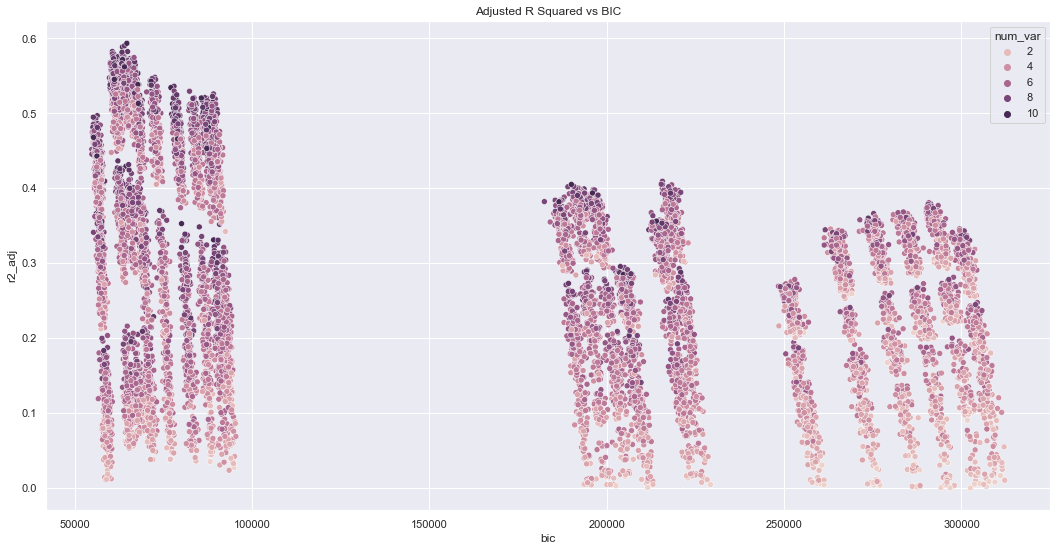

In [189]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,9))
sns.scatterplot(y="r2_adj", x="bic", hue="num_var", data=bigdf)
plt.title("Adjusted R Squared vs BIC")

Deaths_PER_100K ~ HS_DIPLOMA_ONLY_2018 + PCT_Black_ACS + BACHELORS_PLUS_2018 + Poverty_PCT_2018 + C(StateCD)


                            OLS Regression Results                            
Dep. Variable:        Deaths_PER_100K   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     4023.
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:15:24   Log-Likelihood:            -2.6624e+06
No. Observations:              519414   AIC:                         5.325e+06
Df Residuals:                  519360   BIC:                         5.326e+06
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------

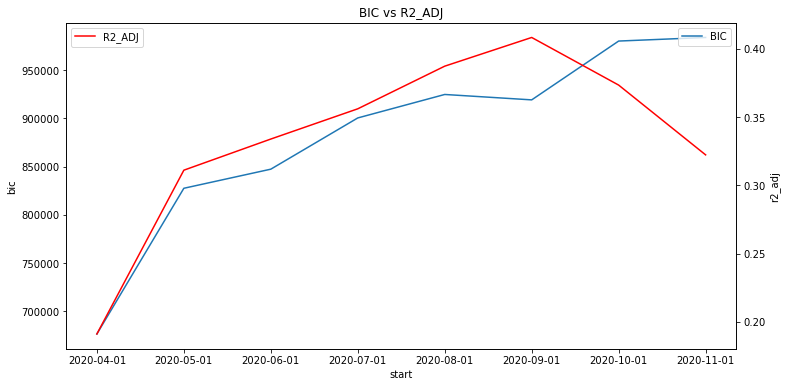

In [70]:
formula1 = """Deaths_PER_100K ~ HS_DIPLOMA_ONLY_2018 + PCT_Black_ACS + BACHELORS_PLUS_2018 + Poverty_PCT_2018 + C(StateCD)
"""
graph_bic_adj2_TS(formulatxt=formula1, list_dateranges=every_month, df=combined)

mod2 = start_end_mulivariate_ols(formulatxt=formula1, startdate='2020-06-01', enddate='2020-11-15', df= combined)
print(mod2.summary())

Deaths_PER_100K ~ C(Metro) + PCT_Black_ACS + Poverty_PCT_2018 + C(StateCD)

                            OLS Regression Results                            
Dep. Variable:        Deaths_PER_100K   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     3914.
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:44:21   Log-Likelihood:            -2.6617e+06
No. Observations:              519414   AIC:                         5.324e+06
Df Residuals:                  519358   BIC:                         5.324e+06
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

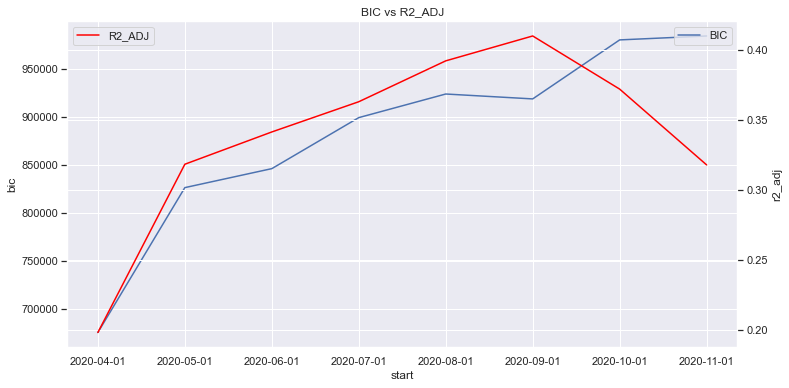

In [102]:
formula1 = """Deaths_PER_100K ~ C(Metro) + PCT_Black_ACS + Poverty_PCT_2018 + C(StateCD)"""
graph_bic_adj2_TS(formulatxt=formula1, list_dateranges=every_month, df=combined)

mod2 = start_end_mulivariate_ols(formulatxt=formula1, startdate='2020-06-01', enddate='2020-11-15', df= combined)
print(mod2.summary())

In [127]:
combined.columns

Index(['Unnamed: 0', 'Date', 'County_FIPS', 'State Code', 'Name',
       'retail_and_recreation_PCT_CFB', 'grocery_and_pharmacy_PCT_CFB',
       'parks_PCT_CFB', 'transit_stations_PCT_CFB', 'workplaces_PCT_CFB',
       'residential_PCT_CFB', 'retail_and_recreation_PCT_CFB_RollingAvg',
       'grocery_and_pharmacy_PCT_CFB_RollingAvg', 'parks_PCT_CFB_RollingAvg',
       'transit_stations_PCT_CFB_RollingAvg', 'workplaces_PCT_CFB_RollingAvg',
       'residential_PCT_CFB_RollingAvg', 'HS_DIPLOMA_ONLY_2018',
       'SOME_COLLEGE_2018', 'BACHELORS_PLUS_2018', 'Poverty_PCT_2018',
       'UrbanCD', 'Median_Income_2018', 'Population_ACS',
       'Population_Black_ACS', 'Population_Hisp_ACS', 'Population_Native_ACS',
       'PCT_Black_ACS', 'PCT_Hisp_ACS', 'PCT_Native_ACS',
       'UrbanCD_Description', 'Metro', 'State', 'Confirmed', 'Deaths',
       'Country/Region', 'Deaths_Previous', 'Confirmed_Previous', 'Deaths_New',
       'Deaths_New_7', 'Deaths_New_14', 'Deaths_New_21', 'Deaths_New_28',
 

## Detecting and managing multicolinearity 

In [ ]:
#Sources: https://etav.github.io/python/vif_factor_python.html
        # https://www.sigmamagic.com/blogs/what-is-variance-inflation-factor/ 

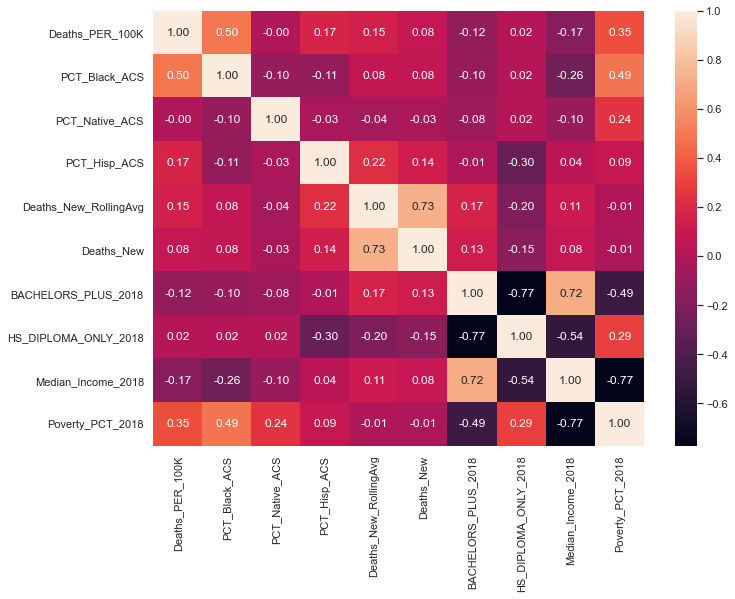

In [192]:
#https://etav.github.io/python/vif_factor_python.html

combined_1day = combined[combined.Date == "2020-10-08"]


cols_subset = ["Deaths_PER_100K","Metro","PCT_Black_ACS",'PCT_Native_ACS',"PCT_Hisp_ACS", "Deaths_New_RollingAvg", "Deaths_New",
               "BACHELORS_PLUS_2018","HS_DIPLOMA_ONLY_2018", "Median_Income_2018", "Region", #"StateCD",
               "Poverty_PCT_2018" #,"StateCD
              ] 
combined_sub2 = combined_1day[cols_subset]

sns.set(rc={'figure.figsize':(11,8)})
corr = combined_sub2.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [180]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [181]:
#combined_sub2_long = pd.get_dummies(combined_sub2, columns=["Metro","StateCD"])
combined_sub2_long_nona = combined_sub2.dropna()

list_col = list(combined_sub2.columns)
list_col.remove("Deaths_PER_100K")

features = "+".join(list_col)


y, X = dmatrices("Deaths_PER_100K ~"+features, combined_sub2, return_type='dataframe')

In [182]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [183]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [184]:
vif.round(1).sort_values(by="VIF Factor", ascending=False).head(50)

,VIF Factor,features
0,342.4,Intercept
15,5.2,Median_Income_2018
13,4.8,BACHELORS_PLUS_2018
16,4.3,Poverty_PCT_2018
14,3.8,HS_DIPLOMA_ONLY_2018
2,3.7,Metro[T.Noncore_adjacent]
1,2.8,Metro[T.Micropolitan]
4,2.6,Metro[T.Smaller_metro]
11,2.3,Deaths_New_RollingAvg
3,2.3,Metro[T.Noncore_remote]
